In [37]:
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt

In [38]:
def space(bounds, step):
    a,b = bounds
    while a <= b + step/10:
        yield a
        a+=step


In [39]:
def RK4(fn, y0, h=1e-5, bounds = (0,1)):
    t = space(bounds, h)
    k1 = lambda t,y: fn(t,y)
    k2 = lambda t,y: fn(t + h/2, y + h*k1(t,y)/2)
    k3 = lambda t,y: fn(t + h/2, y + h*k2(t,y)/2)
    k4 = lambda t,y: fn(t + h, y + h*k3(t,y))
    y=y0
    for tn in t:
        yield (tn, y)
        y = y + h/6*(k1(tn,y) + 2*k2(tn,y) + 2*k3(tn, y) + k4(tn,y))

def RK2(fn, y0, h=1e-5, bounds = (0,1)):
    t = space(bounds, h)
    k1 = lambda t,y: fn(t,y)
    k2 = lambda t,y: fn(t + h/2, y + h/2*k1(t,y))
    y=y0
    for tn in t:
        yield (tn, y)
        y = y + h*k2(tn,y)

In [40]:
f = lambda x,u: np.log(2*u + x) + u
# f = lambda x,u: x + 2*x**2*np.sin(u)
dudxLargeStepRK4 = list(RK4(f, 1, 0.1))
dudxSmallStepRK4 = list(RK4(f, 1, 0.05))
dudxLargeStepRK2 = list(RK2(f, 1, 0.1))
dudxSmallStepRK2 = list(RK2(f, 1, 0.05))

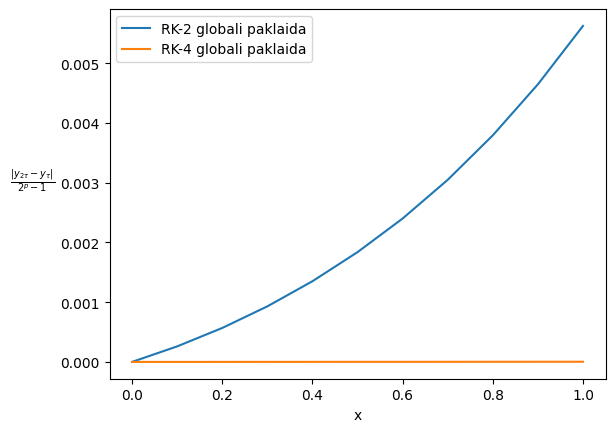

In [41]:
T = [t for (t, _) in dudxLargeStepRK4]
errRK4 = [abs(yt2 - yt)/(2**4-1) for (_,yt2),(_,yt) in zip(dudxLargeStepRK4, dudxSmallStepRK4[::2])]
errRK2 = [abs(yt2 - yt)/(2**2-1) for (_,yt2),(_,yt) in zip(dudxLargeStepRK2, dudxSmallStepRK2[::2])]
plt.plot(T, errRK2, label="RK-2 globali paklaida")
plt.plot(T, errRK4, label="RK-4 globali paklaida")
plt.xlabel('x')
plt.ylabel("$\\frac{|y_{2\\tau}-y_\\tau|}{2^p-1}$", rotation=0, labelpad=20)
plt.legend()

Text(0, 0.5, 'u')

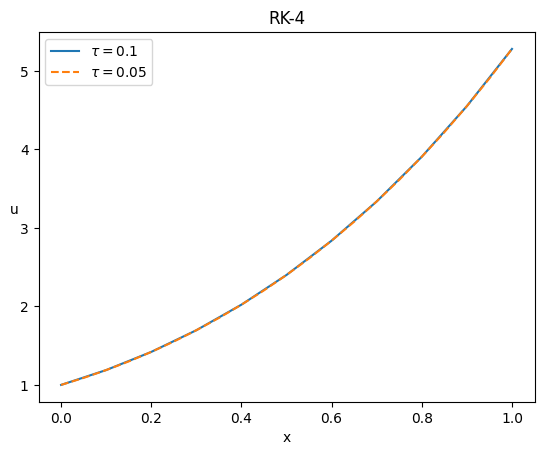

In [42]:
x,y = zip(*dudxLargeStepRK4)
plt.plot(x,y, label="$\\tau=0.1$")
x,y = zip(*dudxSmallStepRK4)
plt.plot(x,y, '--', label="$\\tau=0.05$")
plt.legend()
plt.title("RK-4")
plt.xlabel("x")
plt.ylabel("u", rotation=0)

Text(0, 0.5, 'u')

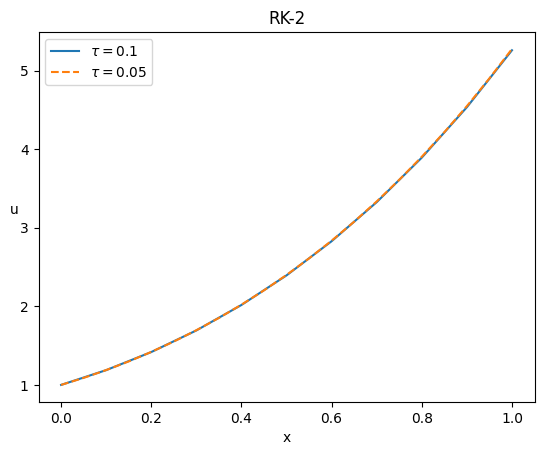

In [43]:
x,y = zip(*dudxLargeStepRK2)
plt.plot(x,y, label="$\\tau=0.1$")
x,y = zip(*dudxSmallStepRK2)
plt.plot(x,y, '--', label="$\\tau=0.05$")
plt.legend()
plt.title("RK-2")
plt.xlabel("x")
plt.ylabel("u", rotation=0)

Text(0, 0.5, 'u')

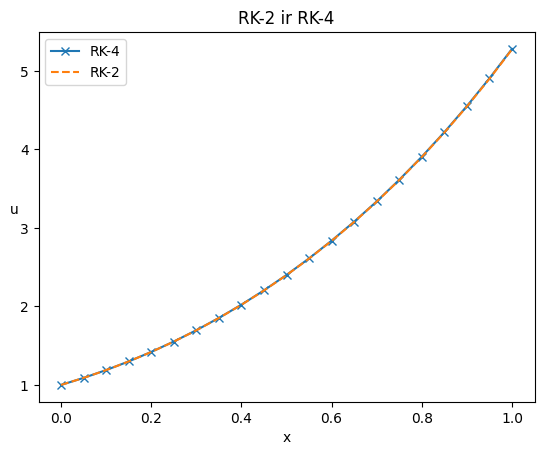

In [44]:
x,y = zip(*dudxSmallStepRK4)
plt.plot(x,y, label="RK-4", marker="x")
x2,y2 = zip(*dudxSmallStepRK2)
plt.plot(x2,y2, '--', label="RK-2")
plt.legend()
plt.title("RK-2 ir RK-4")
plt.xlabel("x")
plt.ylabel("u", rotation=0)

Text(0, 0.5, 'u')

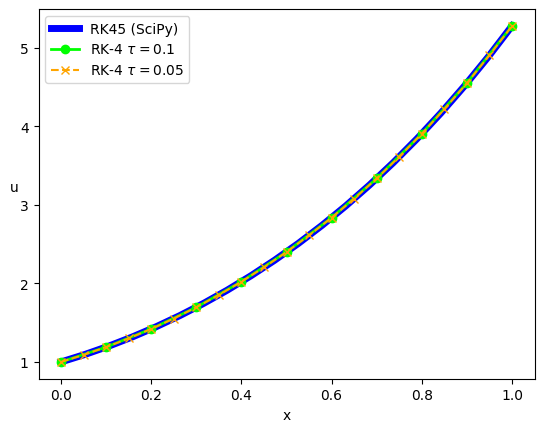

In [45]:
solRK45 = sci.integrate.solve_ivp(f, (0,1), [1], method='RK45', t_eval=np.linspace(0, 1, 20))
plt.plot(solRK45.t, solRK45.y[0], label="RK45 (SciPy)", color='blue', lw=5)
plt.plot(*zip(*dudxLargeStepRK4), label="RK-4 $\\tau=0.1$", color='lime', marker='o', lw=2)
plt.plot(*zip(*dudxSmallStepRK4), '--', label="RK-4 $\\tau=0.05$", color='orange', marker='x')
plt.legend()
plt.xlabel("x")
plt.ylabel("u", rotation=0)

Text(0, 0.5, 'u')

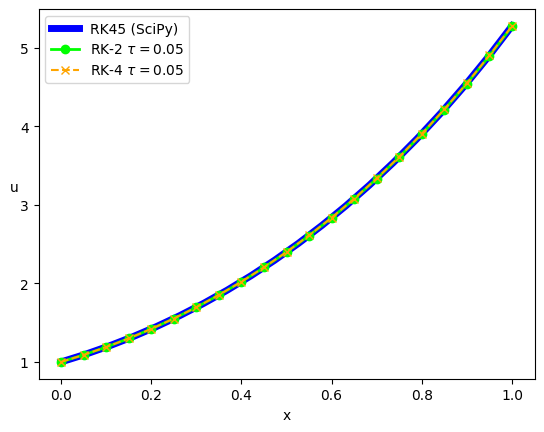

In [46]:
solRK45 = sci.integrate.solve_ivp(f, (0,1), [1], method='RK45', t_eval=np.linspace(0, 1, 20))
plt.plot(solRK45.t, solRK45.y[0], label="RK45 (SciPy)", color="blue", lw=5)
plt.plot(*zip(*dudxSmallStepRK2), label="RK-2 $\\tau=0.05$", color='lime', marker='o', lw=2)
plt.plot(*zip(*dudxSmallStepRK4), '--', label="RK-4 $\\tau=0.05$", color='orange', marker='x')
plt.legend()
plt.xlabel("x")
plt.ylabel("u", rotation=0)